In [1]:
from model_cls import MVPointNet
import numpy as np
import h5py
import os
import random
### For cool 3D interactive visualisations in Jupyter Notebook only (NA for Google Colab)
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode
init_notebook_mode(connected=True)

Using TensorFlow backend.


In [2]:
# Read in the list of categories in MODELNET40
shape_names_file ='shape_names.txt'
shape_names = [line.rstrip() for line in open(shape_names_file)]
print(shape_names)

['bottle', 'bowl', 'cup', 'flower_pot', 'keyboard', 'lamp', 'laptop', 'radio', 'vase', 'xbox']


In [3]:
# plot point cloud 
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
%matplotlib inline
	
def plot_ply(file,a,b):
    fig = plt.figure()
    ax = fig.add_subplot(111,projection='3d')
    ax.set_ylim(-1,1)
    ax.set_xlim(-1,1)
    ax.set_zlim(-1,1)
    x=file[:,0]
    y=file[:,1]
    z=file[:,2]
    ax.scatter(x, y, z, marker='.', zdir='z')
    ax.set_xlabel('X Label')
    ax.set_ylabel('Y Label')
    ax.set_zlabel('Z Label')
    ax.set_title("Original label:"+shape_names[a]+"  Predicted label:"+shape_names[b])
    plt.show()

In [5]:
nb_classes = 10
num_view=1
test_file = './data/ModelNetS/mv_test.h5'
result_file = "./resultsmv/mvpointnet_weights.h5"
model = MVPointNet(nb_classes,num_view)
model.summary()
model.load_weights(result_file)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 1024, 3)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 1024, 64)          256       
_________________________________________________________________
batch_normalization_1 (Batch (None, 1024, 64)          256       
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 1024, 64)          4160      
_________________________________________________________________
batch_normalization_2 (Batch (None, 1024, 64)          256       
_________________________________________________________________
conv1d_3 (Conv1D)    

In [6]:
### from data_loader import DataGenerator
test = h5py.File(test_file, 'r')
# predict
test_y=model.predict(test['data'])
pred_label=np.argmax(test_y, 1)

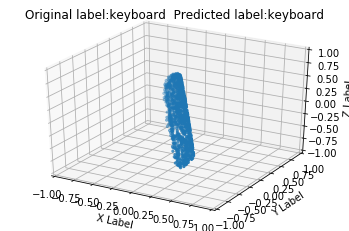

In [61]:
id=random.randint(0,6759)
pct=test['data'][id]
pcty=int(test['label'][id])
plot_ply(pct,pcty,pred_label[id])

In [18]:
print(pct)

[[ 0.52853    -0.30079708  0.34516546]
 [-0.16417895  0.15081452 -0.17788714]
 [ 0.26077396  0.30915368 -0.14857586]
 ...
 [ 0.5880577  -0.30503264 -0.2729574 ]
 [-0.5732112  -0.2827671  -0.23457783]
 [-0.6742028   0.17916486  0.12851472]]
